In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# -------------------------------------
# 1. LOAD AND PREPARE DATA
# -------------------------------------
# Path to the CSV file
# Make sure your data folder contains 'supermarket_sales.csv'

data_path = r"C:\Users\Matias\OneDrive - usach.cl\onedrive\Desktop\data science\supermarket_sales_Sheet1.csv"

# Load data into a DataFrame
df = pd.read_csv(data_path)

# Display dataset shape and sample rows
print("Rows and columns:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst rows of the dataset:\n", df.head(), "\n")

Rows and columns: (1000, 17)
Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

First rows of the dataset:
     Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23

In [7]:
# 2. DATA CLEANING AND FEATURE ENGINEERING
# -------------------------------------
# Convert 'Date' column to datetime to enable time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to datetime (hour:minute) and extract hour as numeric
# This allows us to analyze sales by hour of day
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

# Create a 'DayOfWeek' column (e.g., Monday, Tuesday)
# Useful for grouping sales by day of week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [11]:
# 3. SIMPLE KPI CALCULATIONS
# -------------------------------------
# Total sales: sum of all transactions, indicates overall revenue
# This KPI shows the total income generated by the supermarket in the period
total_sales = df['Total'].sum()
print(f"💰 Total sales: ${total_sales:.2f}")

# Average ticket: mean of transaction values, indicates typical customer spend
# Use this to understand average revenue per sale
average_ticket = df['Total'].mean()
print(f"🧾 Average ticket: ${average_ticket:.2f}")

# Total transactions: number of rows, indicates number of purchases
# This shows the volume of sales events during the period
transaction_count = df.shape[0]
print(f"📦 Total transactions: {transaction_count}\n")

# Sales by gender: group total sales by customer's gender
# Helps understand spending patterns between male and female customers
sales_by_gender = df.groupby('Gender')['Total'].sum()
print("👤 Sales by gender:\n", sales_by_gender, "\n")

# Sales by product line: group total sales by product category, sorted descending
# Identifies which product categories generate the most revenue
sales_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
print("🛒 Sales by product line:\n", sales_by_product, "\n")

# Sales by payment method: group total sales by payment type (cash, card, etc.)
# Shows preference for payment options among customers
sales_by_payment = df.groupby('Payment')['Total'].sum()
print("💳 Sales by payment method:\n", sales_by_payment, "\n")

💰 Total sales: $322966.75
🧾 Average ticket: $322.97
📦 Total transactions: 1000

👤 Sales by gender:
 Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64 

🛒 Sales by product line:
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64 

💳 Sales by payment method:
 Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64 



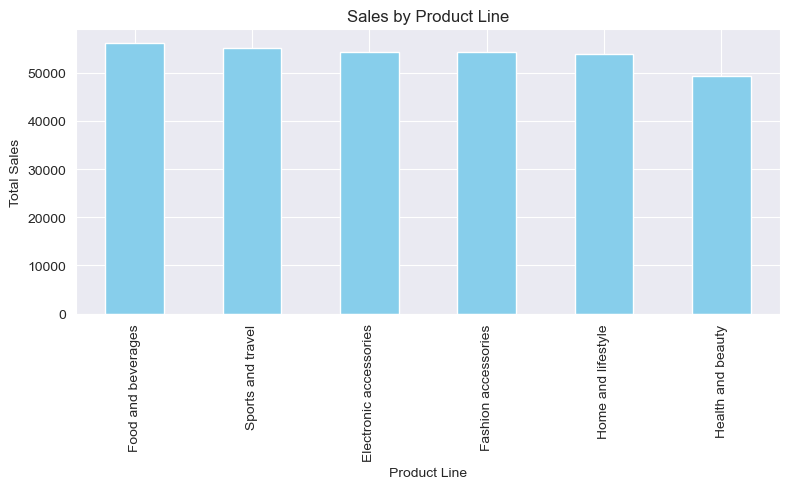

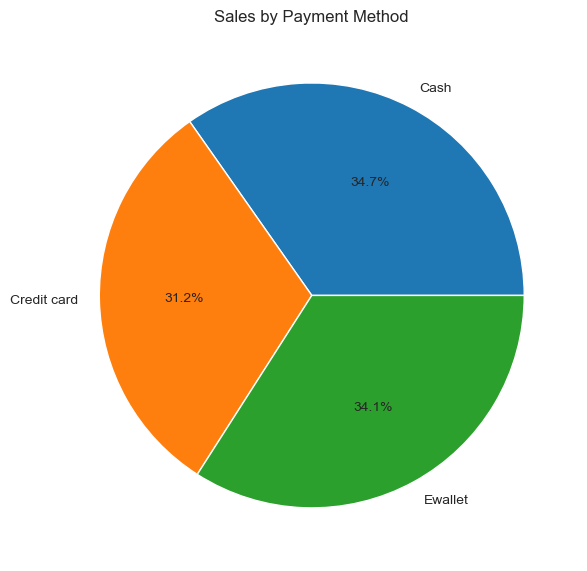

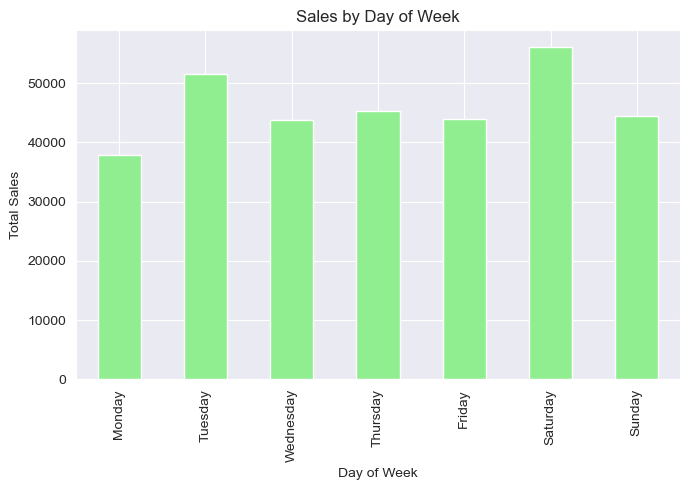

In [13]:
# 4. BASIC VISUALIZATIONS
# -------------------------------------
# Set global style for aesthetics
sns.set_style("darkgrid")

# Bar chart: Sales by product line
# Visualizes which product categories have the highest revenue
graph = sales_by_product.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Pie chart: Sales by payment method
# Shows distribution of revenue by payment types
graph = sales_by_payment.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sales by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Bar chart: Sales by day of the week
# Indicates which days have higher total sales
graph = df.groupby('DayOfWeek')['Total'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='lightgreen', figsize=(7, 5))
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

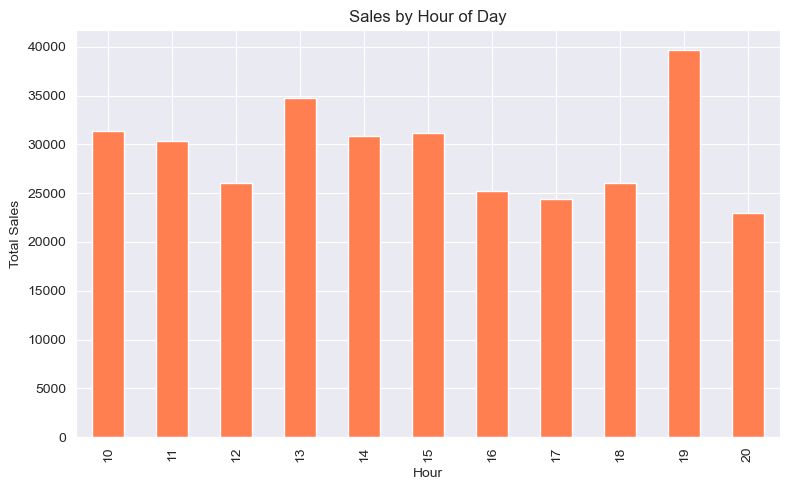

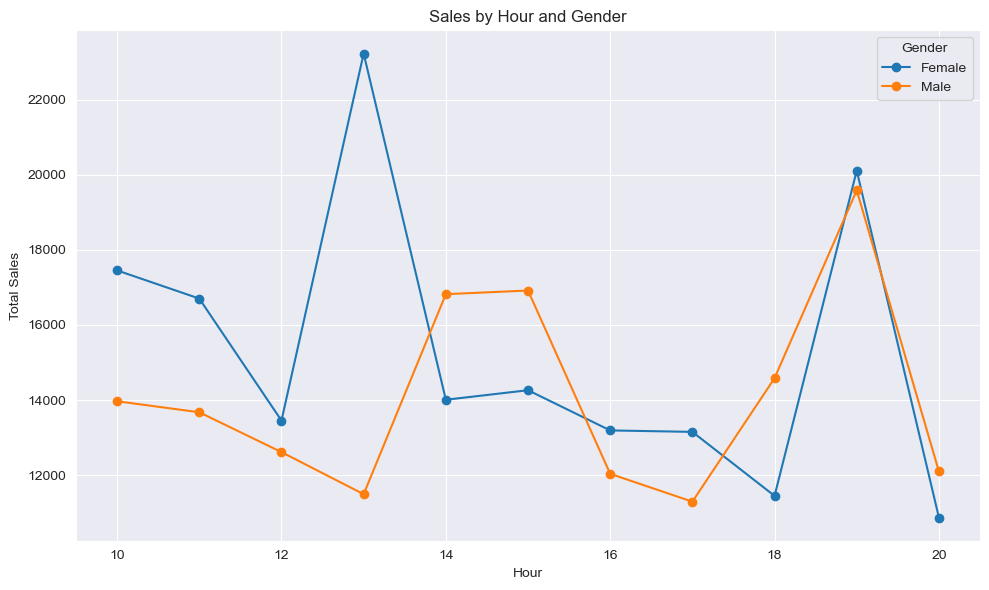

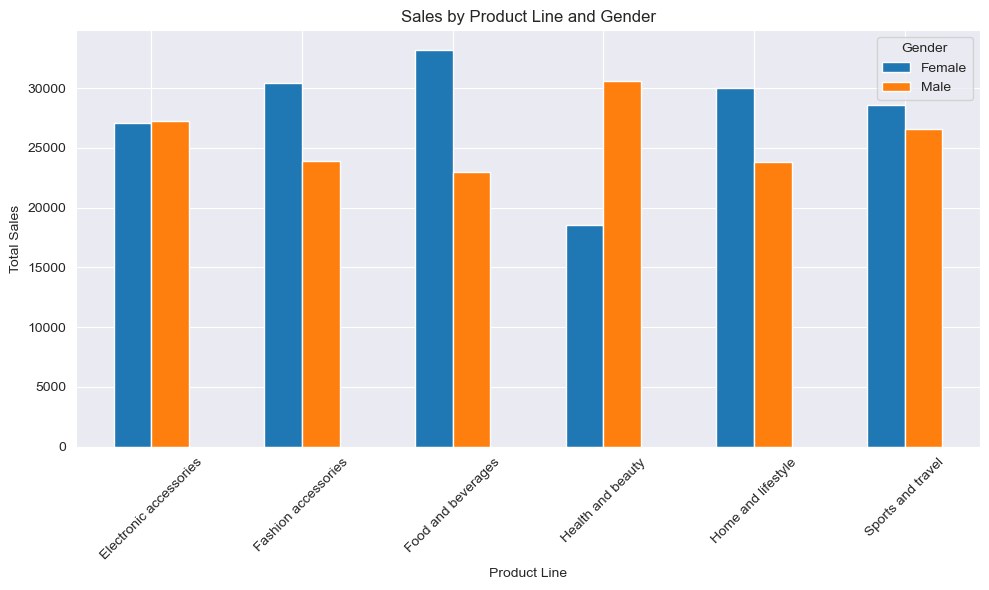

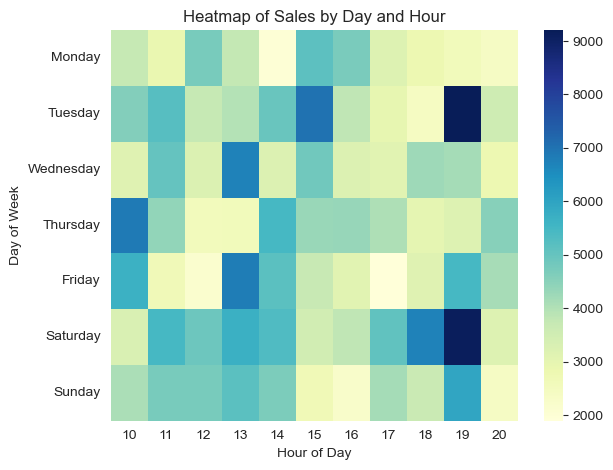

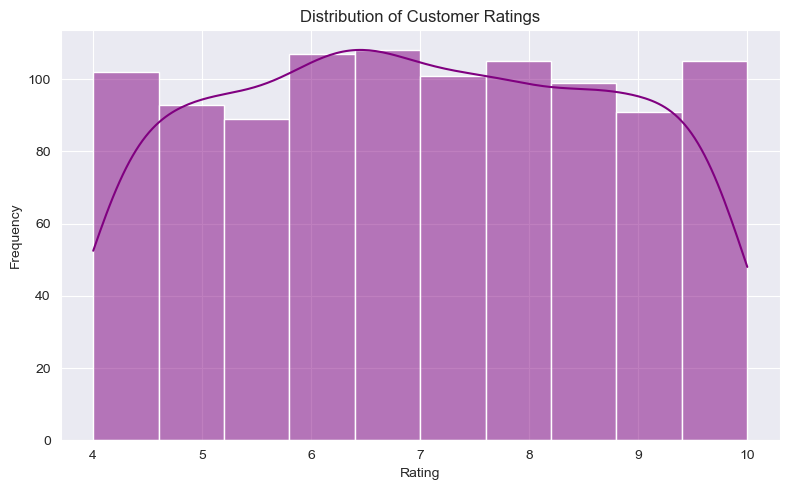

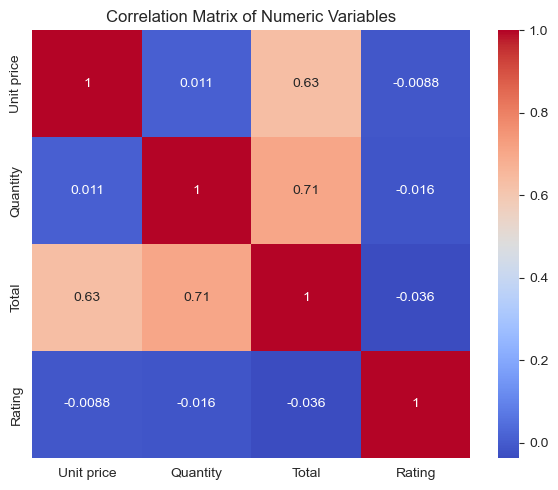

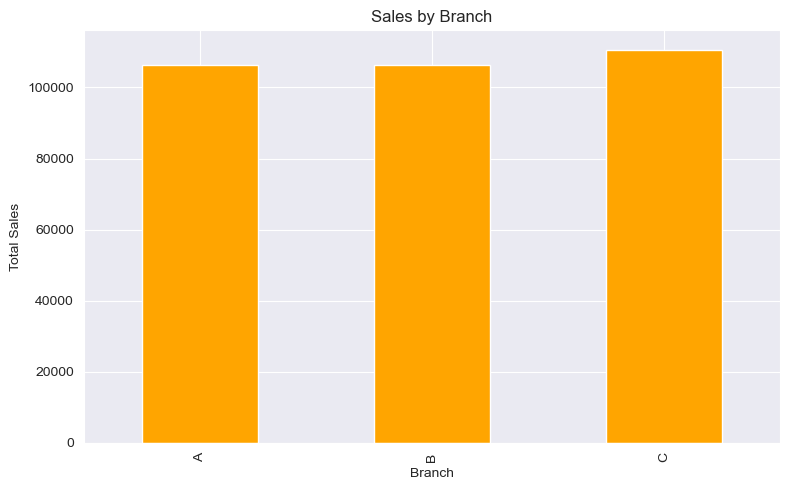

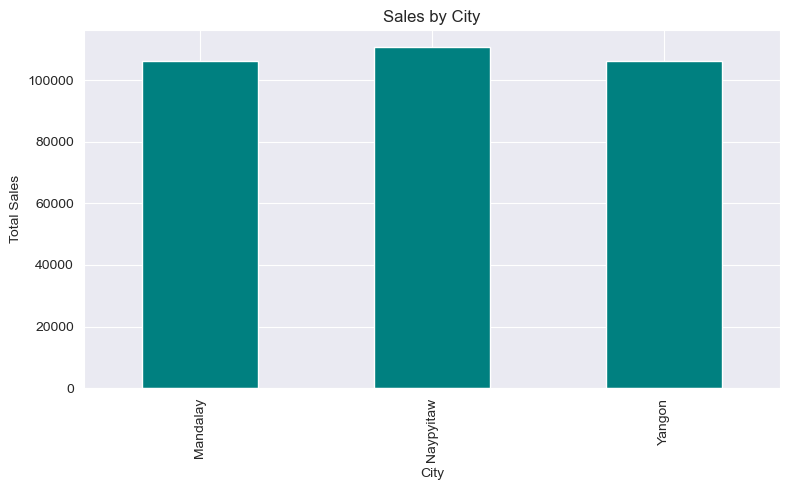

In [15]:
# 5. ADVANCED EXPLORATORY ANALYSIS
# -------------------------------------

# 5.1 Sales by hour of the day
# Identifies peak sales hours during the day
graph = df.groupby('Hour')['Total'].sum().plot(kind='bar', color='coral', figsize=(8, 5))
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 5.2 Sales by hour and gender
# Compares spending patterns of male vs female customers across hours
sales_by_gender_hour = df.groupby(['Hour', 'Gender'])['Total'].sum().unstack()
sales_by_gender_hour.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sales by Hour and Gender')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5.3 Sales by product line and gender
# Shows which product categories are more popular with each gender
graph = df.groupby(['Product line', 'Gender'])['Total'].sum().unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Product Line and Gender')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 5.4 Heatmap: Day vs. Hour sales
# Combines day of week and hour to highlight peak periods in a matrix format
graph = sns.heatmap(
    df.pivot_table(values='Total', index='DayOfWeek', columns='Hour', aggfunc='sum')
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    cmap='YlGnBu'
)
plt.title('Heatmap of Sales by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# 5.5 Distribution of customer ratings
# Histogram with KDE: shows how customer satisfaction ratings are distributed
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5.6 Correlation matrix for numeric variables
# Heatmap: reveals pairwise correlations, useful for feature selection in modeling
plt.figure(figsize=(6, 5))
numeric_corr = df[['Unit price', 'Quantity', 'Total', 'Rating']].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# 5.7 Sales by branch and city
# Bar charts: compare total revenue across different store branches and locations
graph = df.groupby('Branch')['Total'].sum().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
adsales_by_city = df.groupby('City')['Total'].sum().plot(kind='bar', color='teal')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()